# Classification on a given dataset


In this notebook, we will perform classification on a given dataset.

## Import the modules

Let's start by importing the necessary packages.

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, r2_score

from sklearn.model_selection import cross_validate, train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Import the data

In [3]:
X_train = np.load(os.path.join("data", "X_train.npy"))
X_test = np.load(os.path.join("data", "X_test.npy"))
y_train = np.load(os.path.join("data", "y_train.npy"))
y_test = np.load(os.path.join("data", "y_test.npy"))

## Use model

"For this problem, we will compare different models and provide a description of each model's characteristics and capabilities."

1. Decision Tree:
   - Decision Tree is a supervised learning algorithm used for classification and regression tasks.
   - It builds a tree-like model where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome or prediction.
   - The DecisionTreeClassifier is a specific implementation of the decision tree algorithm for classification tasks.

2. SGD (Stochastic Gradient Descent):
   - SGD is an optimization algorithm commonly used for training linear classifiers or regressors.
   - It iteratively updates the model parameters by minimizing the loss function with a small subset of training data in each iteration.
   - The SGDClassifier is an implementation of the SGD algorithm for classification tasks.

3. Random Forest:
   - Random Forest is an ensemble learning method that combines multiple decision trees to make predictions.
   - It creates a set of decision trees and aggregates their predictions to obtain the final prediction.
   - The RandomForestClassifier is an implementation of the random forest algorithm for classification tasks.

4. Perceptron:
   - Perceptron is a binary classification algorithm used for linearly separable data.
   - It learns a linear decision boundary by iteratively updating the model parameters based on the misclassified instances.
   - The Perceptron is a simple linear classifier.

5. LinearSVC (Linear Support Vector Classifier):
   - LinearSVC is a linear classification algorithm based on Support Vector Machines (SVM).
   - It finds the best hyperplane that separates the data into different classes with the largest margin.
   - The LinearSVC is specifically designed for linearly separable data.

6. Logistic Regression:
   - Logistic Regression is a widely used statistical model for binary classification.
   - It estimates the probability of a binary outcome based on the input features by applying the logistic function.
   - The LogisticRegression model uses the logistic regression algorithm for classification tasks.

7. SVC (Support Vector Classifier):
   - SVC is a non-linear classification algorithm based on Support Vector Machines (SVM).
   - It maps the input data to a high-dimensional feature space and finds the best hyperplane to separate the classes.
   - The SVC is a versatile classifier capable of handling non-linear decision boundaries.

Each of these models has its own characteristics, strengths, and suitable use cases. The choice of model depends on the nature of the data and the specific problem you are trying to solve.

Now, we will move on to a more detailed explanation of different models.

### Decision Tree

A decision tree is a hierarchical model that partitions the feature space into rectangular regions and assigns a class or value to each region.

#### Math behind Decision Tree

Let's consider a classification problem with a dataset consisting of $N$ samples, denoted as $(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)$, where $x_i$ represents the feature vector for sample $i$ and $y_i$ represents the corresponding class label.

The Gini impurity at node $t$ is given by:

$$ Gini(t) = 1 - \sum_{i=1}^{c} (p_i)^2 $$

The entropy at node $t$ is given by:

$$ Entropy(t) = - \sum_{i=1}^{c} (p_i \log_2(p_i)) $$

The information gain for a split on feature $F$ is calculated as:

$$ Gain(F) = Entropy(t) - \sum_{v \in Values(F)} \frac{|t_v|}{|t|} \cdot Entropy(t_v) $$

The algorithm chooses the split that maximizes the information gain or minimizes the Gini impurity at each node. This process continues recursively until a stopping criterion is met.



### Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is an iterative optimization algorithm commonly used in machine learning for training various models. It is particularly useful for large-scale datasets. SGD is an extension of the Gradient Descent algorithm, but instead of computing gradients based on the entire dataset, SGD updates the model parameters using a randomly selected subset of training examples at each iteration.

#### Math behind SGD

Let's consider a supervised learning problem with a training dataset consisting of N samples, denoted as $(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)$, where $x_i$ represents the feature vector for sample i and $y_i$ represents the corresponding target value.

The goal is to find the optimal set of model parameters that minimize a cost or loss function. The basic steps of the SGD algorithm are as follows:

1. Initialize the model parameters, such as weights and biases, randomly or with some predefined values.

2. Randomly select a subset, called a mini-batch, of training examples from the training dataset. Let's say this mini-batch is denoted as $B$.

3. Compute the gradient of the cost function with respect to the model parameters using the selected mini-batch $B$. The gradient is calculated as:

   $$ \nabla J(\theta) = \frac{1}{|B|} \sum_{(x_i, y_i) \in B} \nabla J_i(\theta) $$

   where $\theta$ represents the model parameters, $J(\theta)$ is the cost function, and $J_i(\theta)$ is the cost associated with the sample $(x_i, y_i)$.

4. Update the model parameters using the computed gradient and a learning rate $\alpha$:

   $$ \theta = \theta - \alpha \nabla J(\theta) $$

5. Repeat steps 2-4 for a fixed number of iterations or until convergence.

The key idea behind SGD is that the gradient is estimated based on a random subset of examples, providing an approximation of the true gradient. This allows SGD to make updates more frequently and converge faster compared to traditional Gradient Descent.

SGD is particularly effective when dealing with large datasets because it allows for faster computation and can handle online learning scenarios where data arrives sequentially.

Note: The learning rate $\alpha$ plays a crucial role in SGD. It controls the step size during parameter updates and needs to be chosen carefully to ensure convergence.



### Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It improves the accuracy and robustness of individual decision trees by leveraging the concept of ensemble learning. Random Forest is widely used for both classification and regression tasks in machine learning.

#### Theory behind Random Forest

The main idea behind Random Forest is to create an ensemble of decision trees, where each tree is trained on a random subset of the training data and features. During prediction, the results from multiple trees are combined to make a final prediction.

The key components of Random Forest are:

1. **Bootstrapping**: Randomly select subsets of the original training data, with replacement, to create different training sets for each tree.

2. **Random Feature Selection**: At each node of a decision tree, randomly select a subset of features to consider for splitting. This helps to introduce diversity among the trees.

3. **Voting or Averaging**: For classification tasks, the class prediction is determined by majority voting among the trees. For regression tasks, the predicted value is obtained by averaging the predictions from all the trees.

#### Math behind Random Forest

Let's consider a classification problem with a dataset consisting of N samples, denoted as $(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)$, where $x_i$ represents the feature vector for sample i and $y_i$ represents the corresponding class label.

Random Forest combines the predictions of multiple decision trees to make the final prediction. Each decision tree is constructed using a subset of the training data and features.

The steps involved in building a Random Forest are as follows:

1. **Bootstrapping**: Randomly select subsets of the training data using a process called bootstrapping. This creates different training sets for each tree.

2. **Random Feature Selection**: At each node of a decision tree, randomly select a subset of features to consider for splitting. This helps introduce diversity among the trees.

3. **Building Decision Trees**: Build multiple decision trees using the selected training data and features. Each tree is trained using a variation of the decision tree algorithm, such as ID3, C4.5, or CART.

4. **Voting or Averaging**: For classification tasks, the class prediction is determined by majority voting among the trees. For regression tasks, the predicted value is obtained by averaging the predictions from all the trees.

Random Forest provides several benefits, including improved accuracy, resistance to overfitting, and the ability to handle high-dimensional datasets.

The combination of bootstrapping, random feature selection, and ensemble learning makes Random Forest a powerful algorithm for various machine learning tasks.

### Perceptron

The Perceptron is a binary classification algorithm that is based on a simplified model of a biological neuron. It is a type of linear classifier that learns to separate data points into different classes by finding an optimal decision boundary.

#### Theory behind Perceptron

The Perceptron algorithm aims to find a hyperplane that can linearly separate the input data points into two classes. It starts with random initial weights and iteratively updates them until convergence or a maximum number of iterations is reached.

The key idea behind the Perceptron is to update the weights based on the misclassified examples until all examples are classified correctly or until a convergence criterion is met.

#### Math behind Perceptron

Let's consider a binary classification problem with a dataset consisting of N samples, denoted as $(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)$, where $x_i$ represents the feature vector for sample i and $y_i$ represents the corresponding class label (+1 or -1).

The Perceptron algorithm can be formulated as follows:

1. Initialize the weights vector $\mathbf{w}$ and the bias term $b$ randomly or with some predefined values.

2. Iterate through the training examples until convergence or a maximum number of iterations:

   - For each example $(\mathbf{x_i}, y_i)$, compute the activation $z_i$ as:
     
     $$z_i = \mathbf{w} \cdot \mathbf{x_i} + b$$

   - Apply the activation function (usually the sign function) to predict the class label $\hat{y_i}$:
     
     $$\hat{y_i} = \text{sign}(z_i)$$

   - If the prediction $\hat{y_i}$ does not match the true label $y_i$, update the weights and bias:
     
     $$\mathbf{w} \leftarrow \mathbf{w} + \alpha \cdot y_i \cdot \mathbf{x_i}$$
     $$b \leftarrow b + \alpha \cdot y_i$$

   - Repeat until all examples are classified correctly or until a convergence criterion is met.

In the above equations, $\alpha$ represents the learning rate, which controls the step size during weight updates. It is a hyperparameter that needs to be tuned carefully.

The Perceptron algorithm is guaranteed to converge if the data is linearly separable. However, if the data is not linearly separable, the algorithm may not converge, and the maximum number of iterations can be used as a stopping criterion.

The Perceptron algorithm can be extended to handle multi-class classification problems using approaches like one-vs-rest or one-vs-one.

### Linear Support Vector Classifier (LinearSVC)

Linear Support Vector Classifier (LinearSVC) is a binary classification algorithm that belongs to the family of Support Vector Machines (SVM). It aims to find an optimal hyperplane that separates the data points into different classes while maximizing the margin between the classes.

#### Theory behind LinearSVC

The LinearSVC algorithm constructs a linear decision boundary by maximizing the margin between the two classes. It is particularly useful when dealing with linearly separable datasets. LinearSVC finds the best hyperplane by solving an optimization problem.

The key idea behind LinearSVC is to find a hyperplane that separates the data points while minimizing the classification error. This hyperplane is determined by a subset of training examples called support vectors.

#### Math behind LinearSVC

Let's consider a binary classification problem with a dataset consisting of N samples, denoted as $(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)$, where $x_i$ represents the feature vector for sample i and $y_i$ represents the corresponding class label (+1 or -1).

The LinearSVC algorithm can be formulated as follows:

1. Define the decision function for a given input sample $\mathbf{x}$ as:

   $$f(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b$$

   where $\mathbf{w}$ represents the weight vector, and $b$ represents the bias term.

2. The decision boundary is determined by the hyperplane where $f(\mathbf{x}) = 0$. The goal is to find the optimal weights $\mathbf{w}$ and bias $b$ that maximize the margin between the classes while minimizing the classification error.

3. The optimization problem can be formulated as:

   $$\text{minimize} \quad \frac{1}{2} \|\mathbf{w}\|^2$$
   $$\text{subject to} \quad y_i(\mathbf{w} \cdot \mathbf{x_i} + b) \geq 1 \quad \forall i = 1, 2, ..., N$$

   where $\|\mathbf{w}\|$ represents the Euclidean norm of the weight vector.

4. The above problem can be solved using various optimization techniques such as quadratic programming or gradient descent.

5. Once the optimal weights $\mathbf{w}$ and bias $b$ are obtained, the class prediction for a new input sample $\mathbf{x}$ is determined based on the sign of $f(\mathbf{x})$:

   $$\hat{y} = \text{sign}(f(\mathbf{x}))$$

The LinearSVC algorithm can be extended to handle multi-class classification problems using approaches like one-vs-rest or one-vs-one.


### Logistic Regression

Logistic Regression is a popular classification algorithm used to model the probability of a binary outcome. It estimates the probabilities by fitting a logistic function to the input features. Despite its name, logistic regression is primarily used for classification tasks rather than regression.

#### Theory behind Logistic Regression

The logistic regression algorithm models the relationship between the input features and the probability of the binary outcome using the logistic function (also known as the sigmoid function). It assumes that the log-odds of the probability can be expressed as a linear combination of the input features.

The key idea behind logistic regression is to find the optimal weights that maximize the likelihood of observing the training data, given the model parameters. This is typically done by minimizing a loss function such as the logistic loss or cross-entropy loss.

#### Math behind Logistic Regression

Let's consider a binary classification problem with a dataset consisting of N samples, denoted as $(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)$, where $x_i$ represents the feature vector for sample i and $y_i$ represents the corresponding binary class label (0 or 1).

The logistic regression algorithm can be formulated as follows:

1. Define the logistic function (sigmoid function) as:

   $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

   where $z$ is a linear combination of the input features and model weights:

   $$z = \mathbf{w} \cdot \mathbf{x} + b$$

   Here, $\mathbf{w}$ represents the weight vector, $\mathbf{x}$ represents the feature vector, and $b$ represents the bias term.

2. The logistic regression model estimates the probability of the positive class (class 1) given the input features as:

   $$P(y=1|\mathbf{x}) = \sigma(\mathbf{w} \cdot \mathbf{x} + b)$$

3. The predicted probability of the negative class (class 0) is given by:

   $$P(y=0|\mathbf{x}) = 1 - P(y=1|\mathbf{x})$$

4. The likelihood of observing the training data can be expressed as the product of the probabilities for each sample:

   $$L(\mathbf{w}, b) = \prod_{i=1}^{N} [P(y=1|\mathbf{x_i})]^{y_i} [P(y=0|\mathbf{x_i})]^{1-y_i}$$

5. The goal is to find the optimal weights $\mathbf{w}$ and bias $b$ that maximize the likelihood, or equivalently, minimize the negative log-likelihood:

   $$\text{minimize} \quad -\log L(\mathbf{w}, b)$$

   This can be achieved using optimization techniques such as gradient descent or Newton's method.

6. Once the optimal weights $\mathbf{w}$ and bias $b$ are obtained, the class prediction for a new input sample $\mathbf{x}$ is determined based on the predicted probability:

   $$\hat{y} = \begin{cases} 1, & \text{if } P(y=1|\mathbf{x}) > 0.5 \\ 0, & \text{otherwise} \end{cases}$$

Logistic Regression can also be extended to handle multi-class classification problems using approaches like one-vs-rest or softmax regression.

### Support Vector Classifier (SVC)

Support Vector Classifier (SVC) is a binary classification algorithm that belongs to the family of Support Vector Machines (SVM). It aims to find an optimal hyperplane that separates the data points into different classes while maximizing the margin between the classes.

#### Theory behind SVC

The SVC algorithm constructs a hyperplane that separates the data points into different classes while maximizing the margin between the classes. It is particularly useful when dealing with non-linearly separable datasets. SVC finds the best hyperplane by solving an optimization problem.

The key idea behind SVC is to find a hyperplane that separates the data points while minimizing the classification error. The decision boundary is determined by a subset of training examples called support vectors.

#### Math behind SVC

Let's consider a binary classification problem with a dataset consisting of N samples, denoted as $(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)$, where $x_i$ represents the feature vector for sample i and $y_i$ represents the corresponding class label (+1 or -1).

The SVC algorithm can be formulated as follows:

1. Define the decision function for a given input sample $\mathbf{x}$ as:

   $$f(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b$$

   where $\mathbf{w}$ represents the weight vector, and $b$ represents the bias term.

2. The decision boundary is determined by the hyperplane where $f(\mathbf{x}) = 0$. The goal is to find the optimal weights $\mathbf{w}$ and bias $b$ that maximize the margin between the classes while minimizing the classification error.

3. The optimization problem can be formulated as:

   $$\text{minimize} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{N} \xi_i$$
   $$\text{subject to} \quad y_i(\mathbf{w} \cdot \mathbf{x_i} + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i = 1, 2, ..., N$$

   where $\|\mathbf{w}\|$ represents the Euclidean norm of the weight vector, and $\xi_i$ represents slack variables that allow for margin violations. The parameter $C$ controls the trade-off between maximizing the margin and minimizing the classification error. It is a hyperparameter that needs to be tuned carefully.

4. The above problem can be solved using techniques like quadratic programming or convex optimization.

5. Once the optimal weights $\mathbf{w}$ and bias $b$ are obtained, the class prediction for a new input sample $\mathbf{x}$ is determined based on the sign of $f(\mathbf{x})$:

   $$\hat{y} = \text{sign}(f(\mathbf{x}))$$

The SVC algorithm can be extended to handle non-linearly separable datasets using techniques like kernel methods, where the input data is transformed into a higher-dimensional feature space to find a linear separating hyperplane.

In [1]:
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "SGD": SGDClassifier(),
    "RandomForest": RandomForestClassifier(),
    "Perceptron": Perceptron(),
    "LinearSVC": LinearSVC(C=1),
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
}

final_scores = {}

NameError: name 'DecisionTreeClassifier' is not defined

The test_classifier function evaluates a classifier model by fitting it to the training data, performing cross-validation on the testing data, and then printing the accuracy score and standard deviation of the model's performance. The function also updates a dictionary called final_scores with the model's mean accuracy score.

In [5]:
def test_classificator(classifier: tuple) -> None:
    """
    Tests a classifier model and prints the evaluation scores.

    Args:
        classifier (tuple): A tuple containing the model name as the first element and the classifier object as the second element.

    Returns:
        None
    """
    print("Starting", classifier[0])
    classifier[1].fit(X_train, y_train)
    scores = cross_val_score(classifier[1], X_test, y_test, cv=10, scoring="accuracy")
    mean_score = scores.mean()
    print(
        "we got a",
        "{:.2f}".format(mean_score),
        "accuracy with a standard deviation of",
        "{:.2f}".format(scores.std()),
    )
    print(classifier[0], "score :", mean_score)
    final_scores[classifier[0]] = mean_score
    print()

## Evaluate each model

Starting DecisionTree
we got a 0.72 accuracy with a standard deviation of 0.04
DecisionTree score : 0.716

Starting SGD
we got a 0.82 accuracy with a standard deviation of 0.07
SGD score : 0.82

Starting RandomForest
we got a 0.82 accuracy with a standard deviation of 0.05
RandomForest score : 0.8240000000000001

Starting Perceptron
we got a 0.83 accuracy with a standard deviation of 0.07
Perceptron score : 0.826

Starting LinearSVC


/home/nicolas/.cache/pypoetry/virtualenvs/ftml-3N6BF953-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nicolas/.cache/pypoetry/virtualenvs/ftml-3N6BF953-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nicolas/.cache/pypoetry/virtualenvs/ftml-3N6BF953-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nicolas/.cache/pypoetry/virtualenvs/ftml-3N6BF953-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/nicolas/.cache/pypoetry/virtualenvs/ftml-3N6BF953-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:124

we got a 0.86 accuracy with a standard deviation of 0.06
LinearSVC score : 0.8600000000000001

Starting LogisticRegression
we got a 0.85 accuracy with a standard deviation of 0.06
LogisticRegression score : 0.852

Starting SVC
we got a 0.86 accuracy with a standard deviation of 0.06
SVC score : 0.8640000000000001

DecisionTree score : 0.718
SGD score : 0.786
RandomForest score : 0.8299999999999998
Perceptron score : 0.826
LinearSVC score : 0.8640000000000001
LogisticRegression score : 0.852
SVC score : 0.8640000000000001


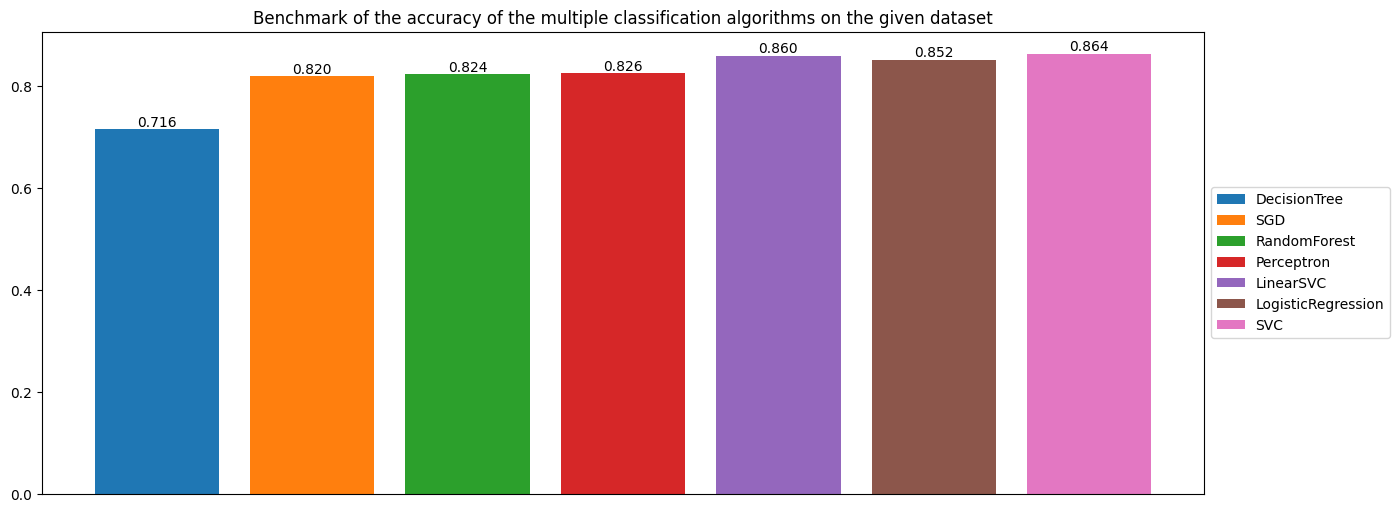

In [6]:
for key, value in models.items():
    test_classificator((key, value))
plt.figure(figsize=(15, 6))
plt.xticks([])
for i, classifier in enumerate(final_scores.items()):
    print(f"{classifier[0]} score : {classifier[1]}")
    plt.bar(i, classifier[1], label=classifier[0])
    plt.text(i, classifier[1], "{:.3f}".format(classifier[1]), ha="center", va="bottom")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title(
    "Benchmark of the accuracy of the multiple classification algorithms on the given dataset"
)

plt.show()